In [1]:
#Import Modules
import numpy as np
import pandas as pd
import scipy
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc

c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
demographics = pd.read_csv("demographs.csv").iloc[:,1:].reset_index()
gene_expression = pd.read_csv("selected_features.csv").reset_index()
serial = pd.read_csv("serial features.csv").reset_index()

In [5]:
gene_expression.T.to_excel('admission.xlsx')

In [30]:
gene_expression

,index,Unnamed: 0,ENSG00000108691,ENSG00000179639,ENSG00000133742,ENSG00000223609,ENSG00000169877,ENSG00000115590,ENSG00000004939,ENSG00000143416,...,ENSG00000086506,ENSG00000196415,ENSG00000076864,ENSG00000105610,ENSG00000250361,ENSG00000108309,ENSG00000243064,ENSG00000189221,ENSG00000174358,Diagnosis
0,0,MVIR1HS101D0PBMC1RSQ1,6.912381,6.610607,9.934184,8.572786,7.839837,11.356480,8.303397,7.972576,...,9.188768,6.654163,7.289988,7.476588,5.997431,7.249207,6.457718,6.775346,5.472703,1
1,1,MVIR1HS107D0PBMC1RSQ1,6.313121,9.009264,12.539489,13.922281,11.899884,11.938576,10.814903,10.473101,...,10.910829,10.476294,8.495648,9.406366,8.230525,7.902985,7.631221,7.028449,5.770272,1
2,2,MVIR1HS109D0PBMC1RSQ1,6.745634,9.806874,11.160206,10.579923,9.529806,6.680774,9.828811,9.602969,...,8.023982,8.023982,6.883955,6.956217,7.073093,6.310483,6.310483,6.372622,5.781951,0
3,3,MVIR1HS10D0PBMC1RSQ4,5.234901,7.757870,10.042230,9.044351,7.655400,14.238042,8.037416,8.093754,...,8.864475,5.708930,6.371626,6.997812,5.234901,5.234901,6.744359,6.775413,5.234901,0
4,4,MVIR1HS111D0PBMC1RSQ1,6.403669,9.230498,6.025628,6.094624,5.722875,7.812937,5.633959,6.025628,...,6.837799,5.949287,5.831145,6.372365,5.517526,5.633959,5.517526,5.517526,5.234901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,MVIR1HS92D0PBMC1RSQ1,6.057933,8.588177,16.619060,16.256196,15.519478,11.352705,14.749399,14.627123,...,13.669458,11.659052,11.940191,12.591695,11.276928,10.490834,8.902203,7.511320,10.305730,0
108,108,MVIR1HS93D0PBMC1RSQ1,6.760135,10.234893,6.844298,7.898617,6.720633,6.592867,6.534782,6.337320,...,6.421133,9.203712,6.044743,6.212178,5.764347,5.796075,5.610320,5.500736,5.234901,0
109,109,MVIR1HS94D0PBMC1RSQ1,5.519254,8.190230,15.820486,15.223330,13.327483,8.829010,14.437898,13.211132,...,11.157379,10.922943,12.305279,11.864377,10.303779,10.057521,9.170606,7.145911,11.163856,1
110,110,MVIR1HS95D0PBMC1RSQ1,6.163632,10.285861,7.547868,8.290362,7.586795,8.430860,7.513572,7.060903,...,7.171260,5.575351,5.788737,6.473329,5.715266,6.445135,5.853175,5.627717,5.234901,0


In [31]:
cleaned = demographics.merge(gene_expression, on = 'index').iloc[:,1:].set_index("Unnamed: 0")

In [37]:
serial = serial.drop(columns = ["Unnamed: 0"])

In [38]:
cleaned = serial.merge(gene_expression, on = 'index').iloc[:,1:].set_index("Unnamed: 0")

In [39]:
y = cleaned.iloc[:,-1:]
X = cleaned.iloc[:,0:-1]
X

,ENSG00000126777,ENSG00000132661,ENSG00000182606,ENSG00000184216,ENSG00000126787,ENSG00000198876,ENSG00000170448,ENSG00000162086,ENSG00000092439,ENSG00000198932,...,ENSG00000173868,ENSG00000086506,ENSG00000196415,ENSG00000076864,ENSG00000105610,ENSG00000250361,ENSG00000108309,ENSG00000243064,ENSG00000189221,ENSG00000174358
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
MVIR1HS101D0PBMC1RSQ1,11.610885,8.737443,10.590446,11.633882,8.404202,10.025143,8.797301,8.966083,11.490571,8.609579,...,9.579589,9.188768,6.654163,7.289988,7.476588,5.997431,7.249207,6.457718,6.775346,5.472703
MVIR1HS107D0PBMC1RSQ1,11.171961,10.008006,10.613123,11.993065,7.435344,12.026104,8.417196,9.332920,10.786036,9.484733,...,10.389751,10.910829,10.476294,8.495648,9.406366,8.230525,7.902985,7.631221,7.028449,5.770272
MVIR1HS109D0PBMC1RSQ1,11.407295,9.640682,10.684559,11.954323,6.049535,11.410930,8.077233,8.965505,10.365801,8.595211,...,8.407910,8.023982,8.023982,6.883955,6.956217,7.073093,6.310483,6.310483,6.372622,5.781951
MVIR1HS10D0PBMC1RSQ4,11.320034,9.722581,10.693391,12.347940,7.670523,11.185440,7.785778,8.025869,10.308296,8.354812,...,8.168975,8.864475,5.708930,6.371626,6.997812,5.234901,5.234901,6.744359,6.775413,5.234901
MVIR1HS111D0PBMC1RSQ1,11.307850,9.344680,10.345176,11.889699,8.425266,9.761879,8.598890,8.985119,10.747638,9.365509,...,7.514299,6.837799,5.949287,5.831145,6.372365,5.517526,5.633959,5.517526,5.517526,5.234901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MVIR1HS92D0PBMC1RSQ1,11.225684,10.046745,10.450805,11.881812,8.093658,14.953911,7.893421,9.110665,10.078633,8.110503,...,13.797141,13.669458,11.659052,11.940191,12.591695,11.276928,10.490834,8.902203,7.511320,10.305730
MVIR1HS93D0PBMC1RSQ1,11.326819,9.516576,10.385052,11.893657,8.077315,9.762654,8.272511,9.050930,10.663066,9.470255,...,7.145612,6.421133,9.203712,6.044743,6.212178,5.764347,5.796075,5.610320,5.500736,5.234901
MVIR1HS94D0PBMC1RSQ1,11.400046,8.495902,10.699138,11.381379,7.699930,14.489439,8.766720,9.039293,10.944958,9.102592,...,12.808920,11.157379,10.922943,12.305279,11.864377,10.303779,10.057521,9.170606,7.145911,11.163856


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
k = 50  # You can tune this value
knn = KNeighborsClassifier(n_neighbors=k)

# Step 2: Train the model on the training data
knn.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = knn.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 82.61%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.00      0.00      0.00         4

    accuracy                           0.83        23
   macro avg       0.41      0.50      0.45        23
weighted avg       0.68      0.83      0.75        23


Confusion Matrix:
 [[19  0]
 [ 4  0]]


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Us

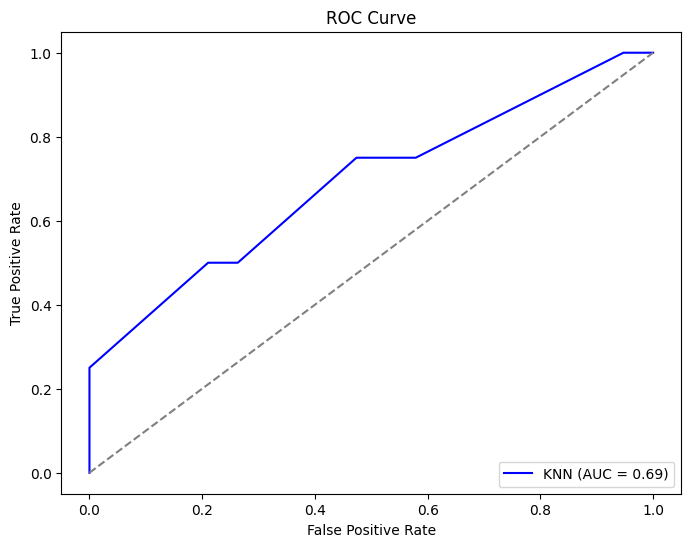

In [68]:
y_prob = knn.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random performance
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

In [27]:
serial_norm_gene_exp = pd.read_csv(f"../Key data files\serial_norm_gene_exp_df.csv").rename(columns = {'Unnamed: 0':'gene_symbols'})
serial_samples_annotation = pd.read_csv(f"../Key data files\serial_samples_annotation.csv").rename(columns = {'X':'patient_ids'})

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\grace\AppData\Local\Temp\ipykernel_23252\1331735976.py:1: SyntaxWarning: invalid escape sequence '\s'
  serial_norm_gene_exp = pd.read_csv(f"../Key data files\serial_norm_gene_exp_df.csv").rename(columns = {'Unnamed: 0':'gene_symbols'})
C:\Users\grace\AppData\Local\Temp\ipykernel_23252\1331735976.py:2: SyntaxWarning: invalid escape sequence '\s'
  serial_samples_annotation = pd.read_csv(f"../Key data files\serial_samples_annotation.csv").rename(columns = {'X':'patient_ids'})


In [ ]:
cleaned = serial_norm_gene_exp.set_index("gene_symbols")

In [ ]:
[serial_samples_annotation['Day'] == 0]

[0       True
 1      False
 2      False
 3      False
 4      False
        ...  
 252    False
 253    False
 254     True
 255    False
 256    False
 Name: Day, Length: 257, dtype: bool]

In [21]:
serial = serial_norm_gene_exp.set_index('gene_symbols').T
serial['Diagnosis'] = serial_samples_annotation['Diagnosis'].tolist()

NameError: name 'serial_norm_gene_exp' is not defined

gene_symbols,index,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,TRBV7-2,LOC729998,GTF2IP12,TRBV6-3,C13orf46,CNTNAP3C,MIR1244-2,EXOC3L2,LINC02009,Diagnosis
0,MVIR1.HS101.D0PBMC1.RSQ1,9.383461,8.366948,7.891559,12.660471,7.387890,9.446774,9.495828,9.741413,6.523522,...,6.133350,9.163414,7.026587,5.091633,10.232327,4.495889,7.485804,5.181471,4.109131,1
1,MVIR1.HS101.D21PBMC1.RSQ1,10.310383,7.956377,6.741496,14.552471,6.922546,10.327389,9.227916,9.845861,6.386183,...,7.094224,6.386183,5.610242,5.535193,5.367325,6.153656,7.918214,5.165732,4.904291,1
2,MVIR1.HS101.D4PBMC1.RSQ1,10.375083,7.873112,7.468121,13.870511,7.497476,10.469843,9.265100,8.667532,6.665808,...,7.382531,6.777208,5.577385,5.673409,5.415525,4.109131,8.144562,5.291724,4.109131,1
3,MVIR1.HS101.D7PBMC1.RSQ1,10.371731,7.121040,7.248001,13.819690,7.519009,10.692787,9.282064,9.439774,6.607311,...,7.293930,7.257307,5.505941,5.703401,5.469294,4.450575,8.476149,5.391949,4.109131,1
4,MVIR1.HS107.D0PBMC1.RSQ1,9.310316,8.173659,7.445675,13.415327,7.035895,9.561536,9.039583,9.435071,6.768943,...,8.186661,9.086468,6.955933,6.903513,8.910014,5.652481,7.386398,7.016331,6.826619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,MVIR1.HS94.D4PBMC1.RSQ1,9.642479,8.018165,7.412978,13.917705,7.297824,8.614582,10.710431,8.900994,6.654886,...,7.543383,6.056251,6.597607,6.340464,6.252479,4.843053,6.964806,7.793009,6.396012,1
253,MVIR1.HS94.D7PBMC1.RSQ1,9.237258,8.081720,7.098533,13.805022,7.301619,8.499271,9.716243,9.068940,7.253534,...,8.180634,6.038644,6.573382,7.191018,6.876925,5.422718,7.098533,6.632092,7.277781,1
254,MVIR1.HS95.D0PBMC1.RSQ1,9.545304,8.173131,7.229096,13.566704,6.412091,9.799661,9.230694,9.165567,6.214891,...,8.164437,9.146615,6.412091,6.858488,8.576010,5.043044,7.965150,5.765033,4.563759,0
255,MVIR1.HS95.D4PBMC1.RSQ1,10.191289,8.146510,7.283772,13.354536,7.093077,9.458147,8.894069,8.770781,6.925544,...,9.049470,7.208865,5.704622,7.658860,5.843781,5.157017,8.069346,6.000414,5.576854,0
